# Police Arrests Data

## Import libraries

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data 

In [252]:
arrests = pd.read_csv('police_arrest.csv', index_col='_id')
arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


## Parse and organize data

Exclude data labeled as "Outside City" as it is not relevant to Pittsburgh-specific analysis, regroup the data by arrest counts, and sort them in ascending order. This shows which neighborhood has the least amount of arrests.

In [256]:
arrests = arrests.rename(columns={
    'INCIDENTNEIGHBORHOOD': 'Neighborhood'
})
arrests = arrests[arrests['Neighborhood'] != 'Outside City']
arrests = arrests.groupby('Neighborhood').size().reset_index(name='Arrests')
arrests = arrests.sort_values(by='Arrests', ascending=True)
arrests

,Neighborhood,Arrests
57,Mt. Oliver Neighborhood,2
90,Troy Hill-Herrs Island,6
56,Mt. Oliver Boro,18
19,Central Northside,23
72,Ridgemont,37
...,...,...
43,Homewood South,2090
26,East Allegheny,2217
15,Carrick,2352
77,South Side Flats,3497


As shown in the table above, Mt. Oliver Neighborhood has the fewest arrests, suggesting it as one of the most desirable neighborhoods to live in based on safety indicators.

## Plot data

In [260]:
arrests_res = pd.DataFrame({
    'Neighborhood': arrests['Neighborhood'],
    'Arrests': arrests['Arrests']
})
arrests_res = arrests_res.set_index('Neighborhood')
arrests_res

,Arrests
Neighborhood,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Ridgemont,37
...,...
Homewood South,2090
East Allegheny,2217
Carrick,2352


Text(0.5, 1.0, 'Police Arrest Records by Neighborhood')

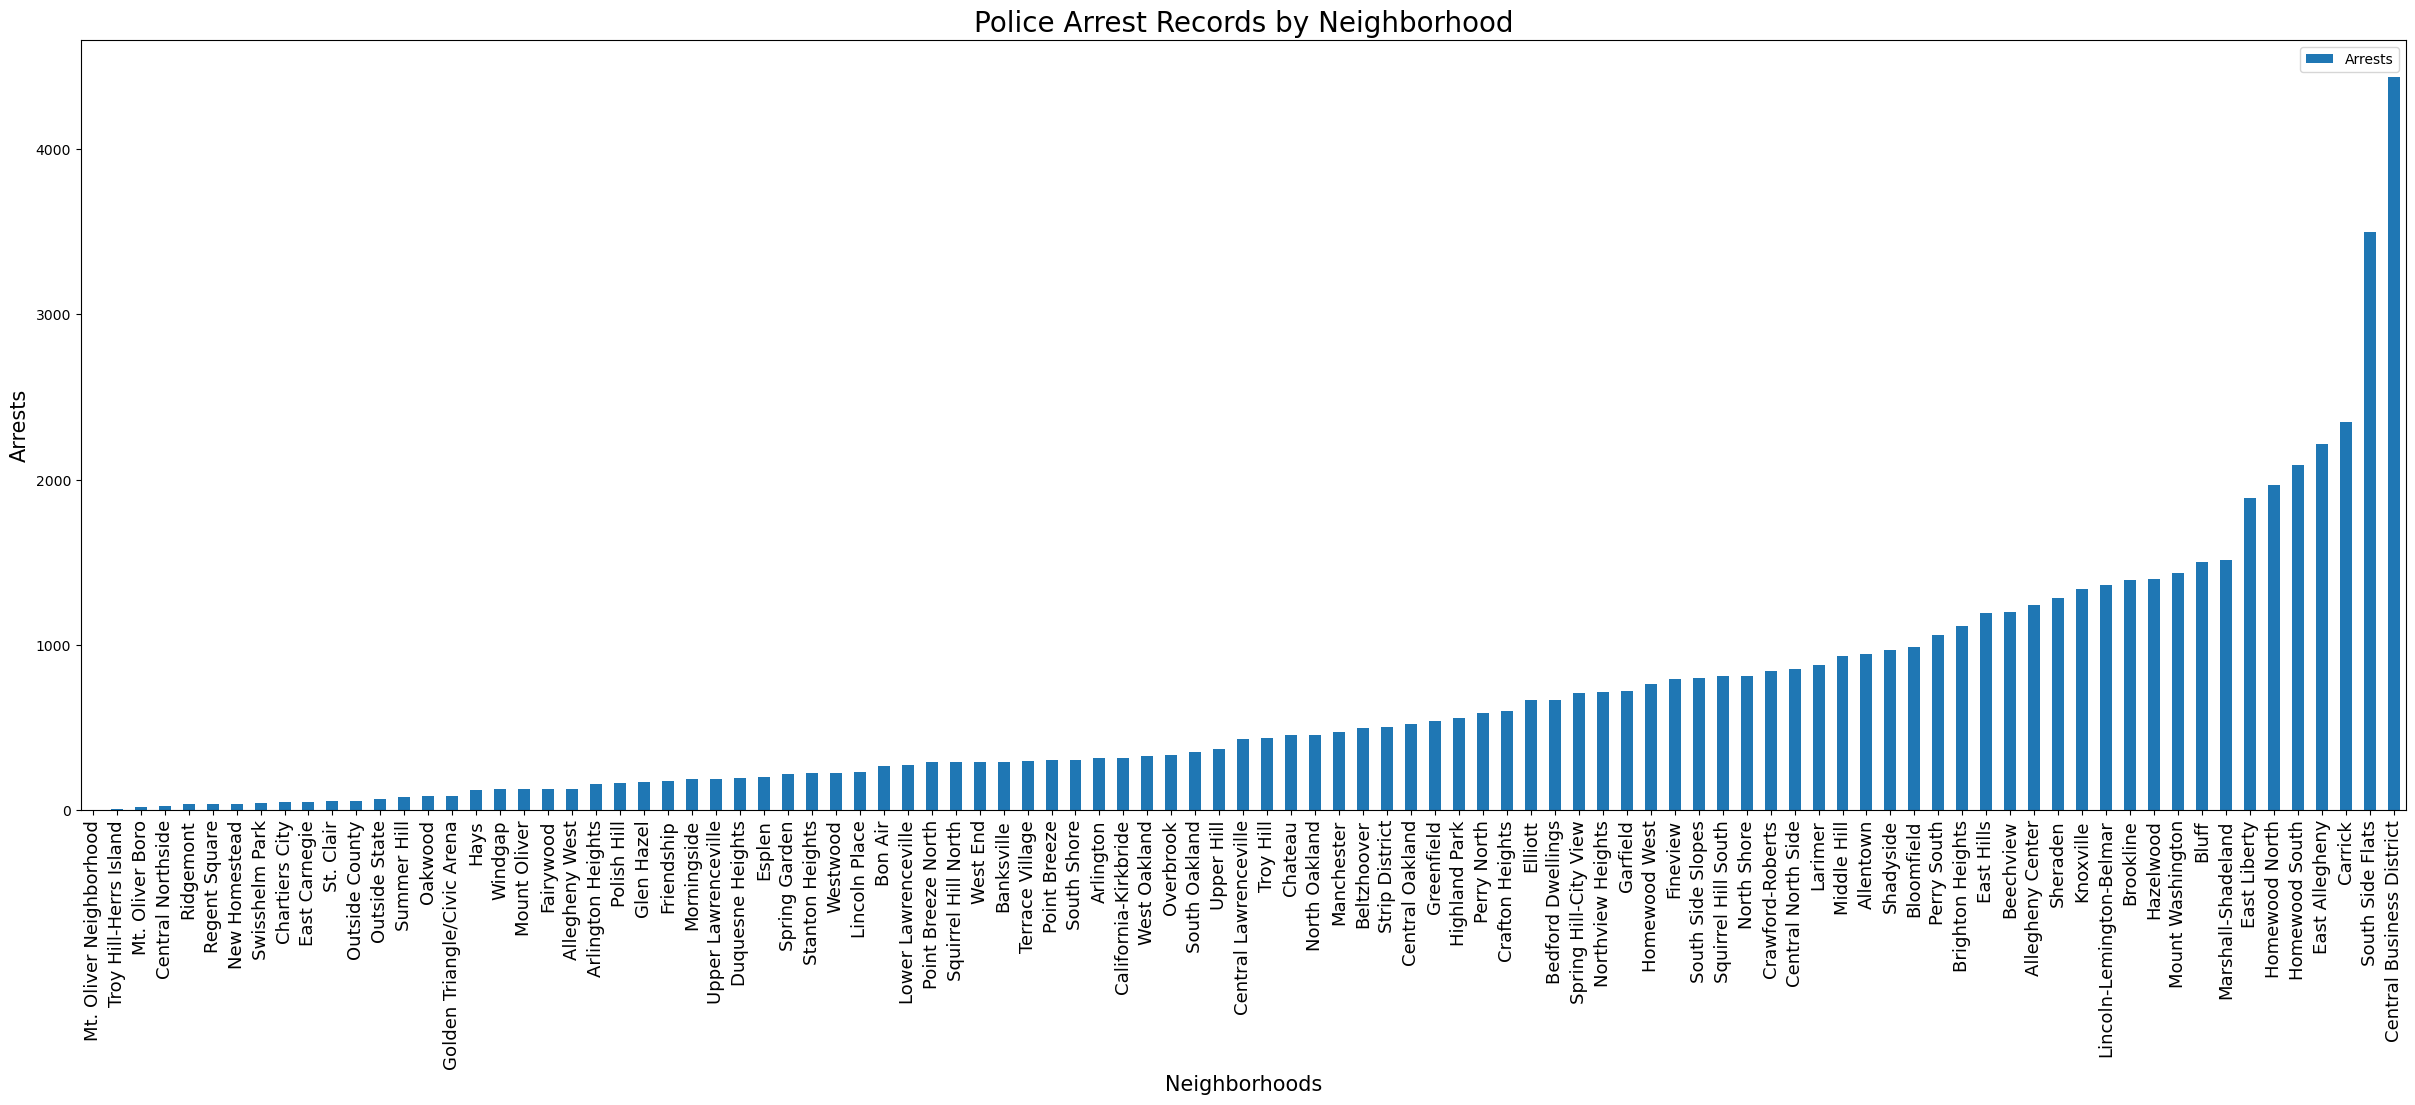

In [267]:
arrests_res.plot.bar(figsize=(30, 10), width=0.5)
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Arrests', fontsize=15)
plt.title('Police Arrest Records by Neighborhood', fontsize=20)